# Programming Assignment 2 Part 2 - Principal Component Analysis

In this programming assignment, you will implement a decision tree model and PCA algorithm.

**For Even Roll Number Students:**

* In this part, you have to implement the PCA algorithm to perform dimensionality reduction on the breast cancer dataset.
* Dataset: ````breast-cancer.csv```` with ``diagnosis`` as the target variable.

**For Odd Roll Number Students:**

* In this part, you have to implement the PCA algorithm to perform dimensionality reduction on the wine quality dataset.
* Dataset: ````wine-quality.csv```` with ``Customer_Segment`` as the target variable.

The assignment zip file (ML_CS60050_A2.zip) contains the respective datasets which will be used in this assignment.

You have to write your code in this jupyter notebook. You have to write your code only between ### START CODE HERE ### and ### END CODE HERE ### comments.

### Assignment Submission Instructions

Please submit your assignment as a ZIP file that contains a folder named in the following format: `RollNo_ML_A2`. Inside this folder, include two Jupyter notebooks and a Report with the following names:

1. `RollNo_A2_Part1.ipynb`
2. `RollNo_A2_Part2.ipynb`
3. `RollNo_report.pdf`


Instructions for the Report:
* Summarize results from noiseless and noisy datasets.
* Compare performance and note the impact of noise.
* Conclude with key findings and implications.

Make sure that you replace `RollNo` with your actual roll number in both the folder name and the notebook filenames.

For example, if your roll number is `23CS60R11`, the folder should be named `23CS60R11_ML_A2`, and the three files should be named `23CS60R11_A2_Part1.ipynb`, `23CS60R11_A2_Part2.ipynb` and `RollNo_report.pdf`.

Submit this ZIP file as your assignment submission.

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### 2.1. Reading and Pre-processing the data

In the following function ```load_data```, you have to read the data from the file and store the data into a pandas dataframe. Then you have to create two numpy arrays $X$ and $y$ from the dataframe:

+ $X$: Input data of the shape (number of samples, number of input features)
+ $y$: Target variable of the shape (number of samples,)


In [8]:
## CODE REQUIRED ##

def load_data(filepath):
    """
    This function loads the data into a pandas dataframe and coverts it into X and y numpy arrays

    Args:
        filepath: File path as a string
    Returns:
        X: Input data of the shape (# of samples, # of input features)
        y: Target variable of the shape (# of sample,)
    """

    ### START CODE HERE ###
    data = pd.read_csv(filepath)
    X = data.iloc[:, 1:]  
    y = data.iloc[:, 0] 
    ### END CODE HERE ###
    return X,y

filepath = None
### START CODE HERE ###
filepath = "./breast-cancer.csv"
### END CODE HERE ###
X, y = load_data(filepath)

print("Shape of X:",X.shape, " Shape of y:",y.shape)
# print(X)
# print(y)

Shape of X: (569, 30)  Shape of y: (569,)


### 2.2. Model Implementation

### The main steps of the PCA algorithm are as follows:

1. Compute the mean of the input data along each feature dimension.
2. Subtract the mean from the input data to center it around zero.
3. Compute the covariance matrix of the centered input data.
4. Compute the eigenvectors and eigenvalues of the covariance matrix.
5. Keep only the first `n_components` eigenvectors as the principal components.
6. Compute the explained variance ratio for each principal component.
7. Transform the input data by projecting it onto the principal components.

#### The mean of the input data along each feature dimension is computed as:

$$
\boldsymbol{\mu} = \frac{1}{n}\sum_{i=1}^{n}\mathbf{x}_i
$$

where $n$ is the number of samples and $\mathbf{x}_i$ is the feature vector of the $i$th sample.

#### The centered input data is computed as:

$$
\mathbf{x}_i' = \mathbf{x}_i - \boldsymbol{\mu}
$$

where $\mathbf{X}$ is the input data matrix with shape $(n, p)$, $n$ is the number of samples, and $p$ is the number of features.

#### The covariance matrix of the centered input data is computed as:

$$
\mathbf{C} = \frac{1}{n-1}\sum_{i=1}^{n}(\mathbf{x}_i' \cdot \mathbf{x}_i'^T)
$$

where $\mathbf{C}$ is the covariance matrix with shape $(p, p)$.

#### The eigenvectors and eigenvalues of the covariance matrix are computed as:

$$
\mathbf{C} \cdot \mathbf{v}_i = \lambda_i \cdot \mathbf{v}_i
$$

where $\mathbf{v}_i$ is the $i$th eigenvector with length $p$, and $\lambda_i$ is the corresponding eigenvalue.

#### Here, we keep only the first `n_components` eigenvectors as the principal components.

#### The explained variance ratio for each principal component is computed as:

$$
\mathrm{ExplainedVarianceRatio_i} = \frac{\lambda_i}{\sum_{j=1}^{p}\lambda_j}
$$

where $\mathrm{ExplainedVarianceRatio_i}$ is the explained variance ratio for the $i$th principal component.

#### The transformed data is computed as:

$$
\mathbf{X}_{\text{transformed}} = \mathbf{X}_{\text{centered}} \cdot \mathbf{V}
$$

where $\mathbf{V}$ is the matrix of principal components with shape $(p, k)$, $\mathbf{X}_{\text{centered}}$ is the centered input data matrix with shape $(n, p)$, and $\mathbf{X}_{\text{transformed}}$ is the transformed data matrix with shape $(n, k)$.

In [9]:
## CODE REQUIRED ##
class PCA:
    """
    Principal Component Analysis (PCA) class for dimensionality reduction.
    """
    
    def __init__(self, n_components):
        """
        Constructor method that initializes the PCA object with the number of components to retain.
        
        Args:
        - n_components (int): Number of principal components to retain.
        """
        self.n_components = n_components
        
    def fit(self, X):
        """
        Fits the PCA model to the input data and computes the principal components.
        (HINT: Use numpy's linalg module to compute eigenvalues and eigenvectors)
        
        Args:
        - X (numpy.ndarray): Input data matrix with shape (n_samples, n_features).
        """
        # Compute the mean of the input data along each feature dimension.
        ### START CODE HERE ###
        mean = np.mean(X, axis=0)
        ### END CODE HERE ###
        
        # Subtract the mean from the input data to center it around zero.
        ### START CODE HERE ###
        X = X - mean
        ### END CODE HERE ###
        
        # Compute the covariance matrix of the centered input data.
        ### START CODE HERE ###
        cov = np.cov(X, rowvar=False)
        ### END CODE HERE ###
        
        # Compute the eigenvectors and eigenvalues of the covariance matrix.
        ### START CODE HERE ###
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        ### END CODE HERE ###
        
        # Keep only the first n_components eigenvectors as the principal components.
        self.components = eigenvectors[:,:self.n_components]
        
        # Compute the total variance of the input data
        ### START CODE HERE ###
        total_variance = np.sum(eigenvalues)
        ### END CODE HERE ###

        # Compute the variance explained by each principal component
        self.explained_variances = eigenvalues[:self.n_components]

        # Compute the explained variance ratio for each principal component
        self.explained_variance_ratio_ = self.explained_variances / total_variance
        
    def transform(self, X):
        """
        Transforms the input data by projecting it onto the principal components.
        
        Args:
        - X (numpy.ndarray): Input data matrix with shape (n_samples, n_features).
        
        Returns:
        - transformed_data (numpy.ndarray): Transformed data matrix with shape (n_samples, n_components).
        """
        
        ### START CODE HERE ###
        mean = np.mean(X, axis=0)
        X_centered = X - mean
        transformed_data = np.dot(X_centered, self.components)
        ### END CODE HERE ###
        
        return transformed_data
    
    def fit_transform(self, X):
        """
        Fits the PCA model to the input data and computes the principal components then
        transforms the input data by projecting it onto the principal components.
        
        Args:
        - X (numpy.ndarray): Input data matrix with shape (n_samples, n_features).
        """
        self.fit(X)
        transformed_data = self.transform(X)
        return transformed_data

### 2.3. Executing the PCA Algorithm

In [10]:
# Initialize the PCA class with the number of principal components to retain (in this case, 2).
pca = PCA(2)

# Fit the PCA model to the input data X.
pca.fit(X)

# Print the explained variance ratio for each of the selected principal components.
# This shows how much variance each principal component explains in relation to the total variance.
print(pca.explained_variance_ratio_)

[1.55344680e-12 4.43666945e-12]


### 2.4. Transforming Data

In [11]:
# Transform the input data X using the previously fitted PCA model.
X_transformed = pca.transform(X)

# Print the shape of the transformed data X.
print("Shape of transformed X: ", X_transformed.shape)


Shape of transformed X:  (569, 2)


### 2.5. Visualizing Data

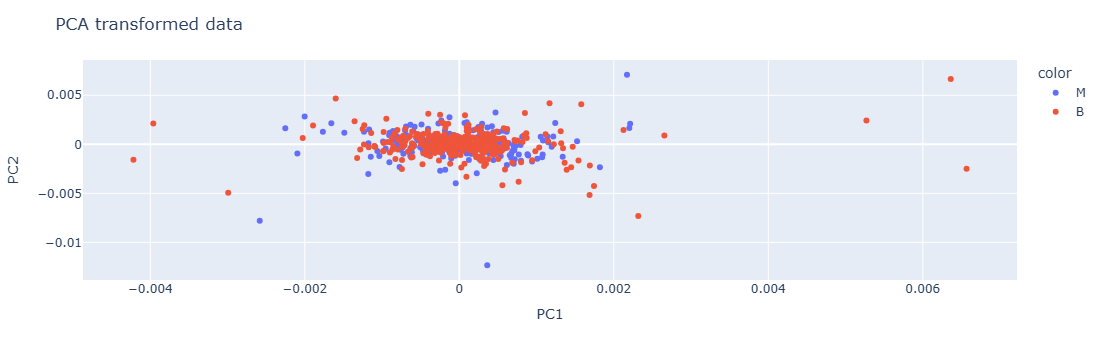

In [12]:
# Create a scatter plot using Plotly to visualize the PCA-transformed data.
fig = px.scatter(x=X_transformed[:,0], y=X_transformed[:,1], color=y)
fig.update_layout(
    title="PCA transformed data",
    xaxis_title="PC1",
    yaxis_title="PC2"
)
fig.show()